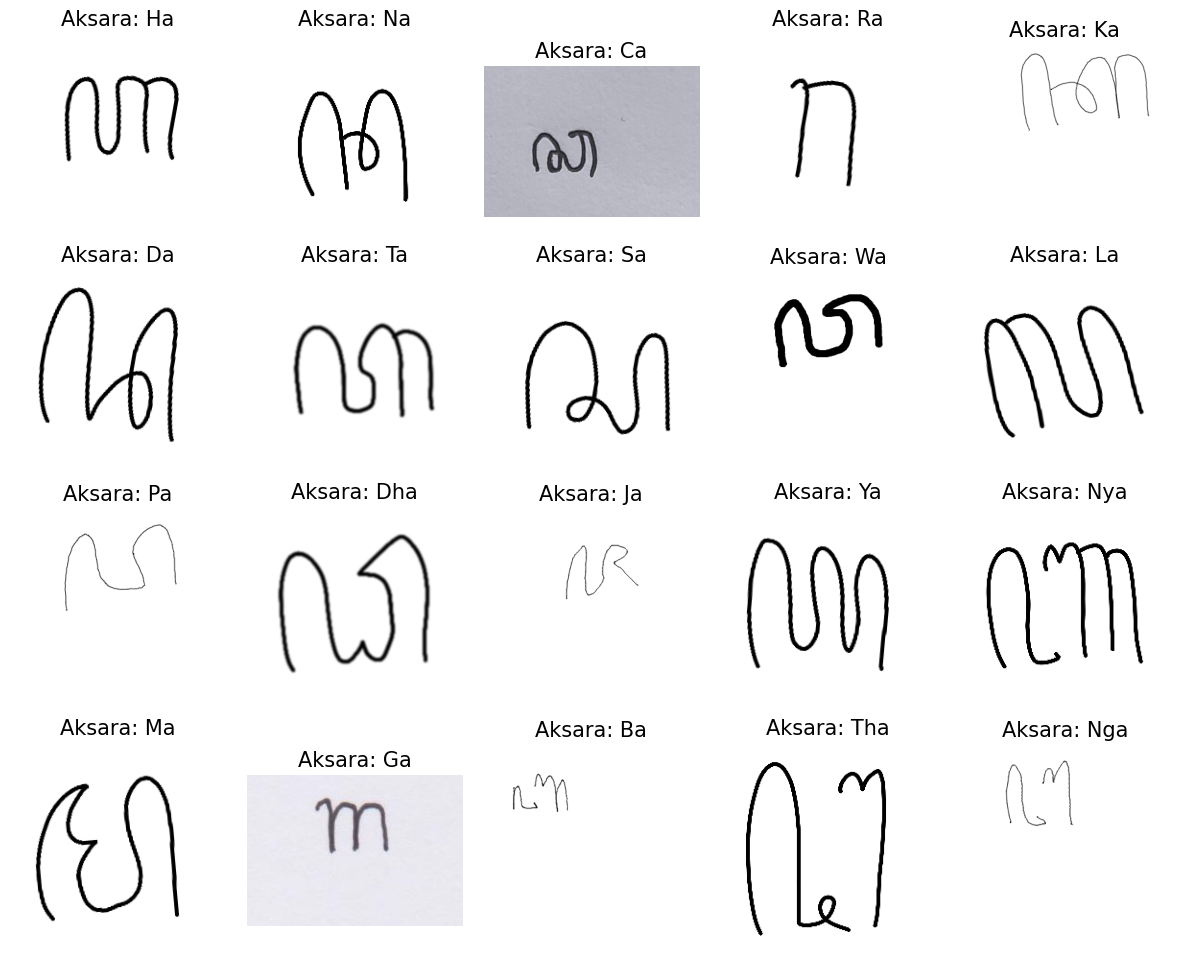

Jumlah data di setiap kelas:
label
ha     214
na     219
ca     218
ra     217
ka     219
da     220
ta     216
sa     219
wa     220
la     219
pa     216
dha    218
ja     218
ya     218
nya    214
ma     218
ga     219
ba     225
tha    217
nga    211
Name: count, dtype: int64

Total jumlah data: 4355


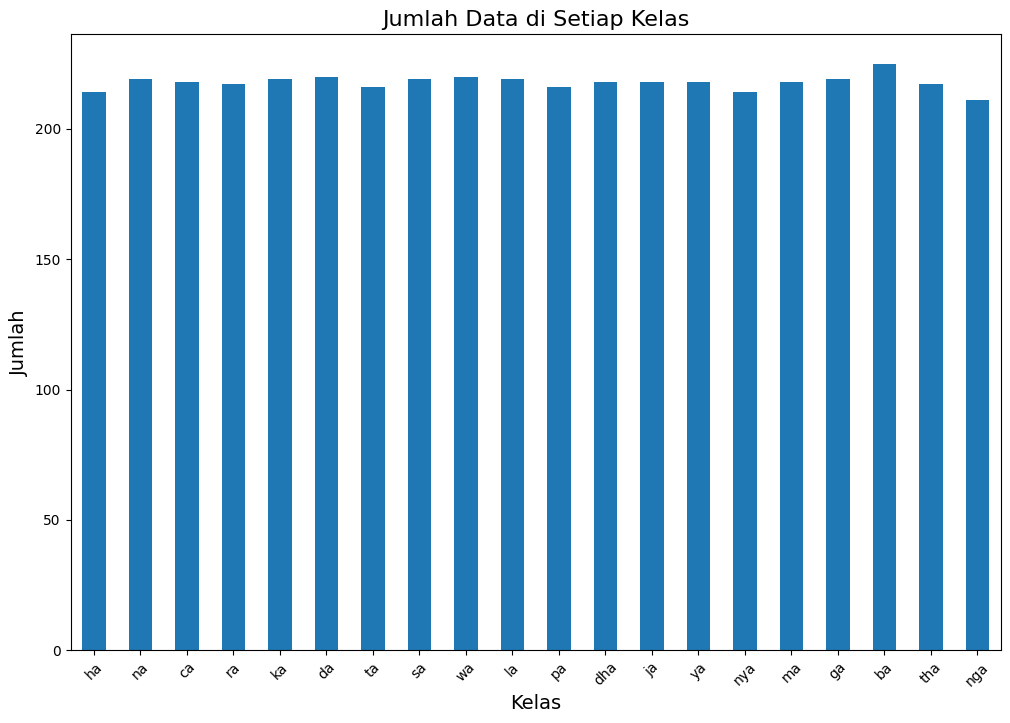

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Pastikan kolom 'file_path' dan 'label' ada dalam dataframe
if 'file_path' not in df.columns or 'label' not in df.columns:
    raise ValueError("DataFrame harus memiliki kolom 'file_path' dan 'label'")

# Daftar label dalam urutan yang diinginkan
ordered_labels = [
    'ha', 'na', 'ca', 'ra', 'ka',
    'da', 'ta', 'sa', 'wa', 'la',
    'pa', 'dha', 'ja', 'ya', 'nya',
    'ma', 'ga', 'ba', 'tha', 'nga'
]

# Mengatur ukuran plot (4 baris x 5 kolom)
n_rows = 4
n_cols = 5
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
plt.subplots_adjust(hspace=0.1, wspace=0.1)  # Mengurangi jarak antar gambar

# Flatten axes array untuk memudahkan iterasi
axes = axes.flatten()

# Untuk setiap label dalam urutan yang diinginkan, pilih satu gambar secara acak
for i, label in enumerate(ordered_labels):
    if i >= n_rows * n_cols:
        break  # Menghentikan jika lebih banyak label daripada slot gambar
    
    # Filter gambar berdasarkan label
    images_of_label = df[df['label'] == label]
    
    # Pilih satu gambar secara acak
    random_image = images_of_label.sample(n=1)
    
    # Ambil path gambar
    file_path = path_main + random_image['file_path'].values[0]
    
    # Baca dan tampilkan gambar
    img = Image.open(file_path)
    
    # Plot gambar
    axes[i].imshow(img)
    axes[i].set_title(f'Aksara: {label.capitalize()}', fontsize=15)  # Mengatur ukuran font dan kapitalisasi label
    axes[i].axis('off')

# Menyembunyikan sisa subplot jika label kurang dari total slot
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')

# Tampilkan plot
plt.show()

# Menampilkan jumlah data di setiap kelas
label_counts = df['label'].value_counts().reindex(ordered_labels)
print("Jumlah data di setiap kelas:")
print(label_counts)

# Menghitung total jumlah data
total_data = label_counts.sum()
print("\nTotal jumlah data:", total_data)

# Plot jumlah data di setiap kelas
fig, ax = plt.subplots(figsize=(12, 8))
label_counts.plot(kind='bar', ax=ax)
ax.set_title('Jumlah Data di Setiap Kelas', fontsize=16)
ax.set_xlabel('Kelas', fontsize=14)
ax.set_ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.show()


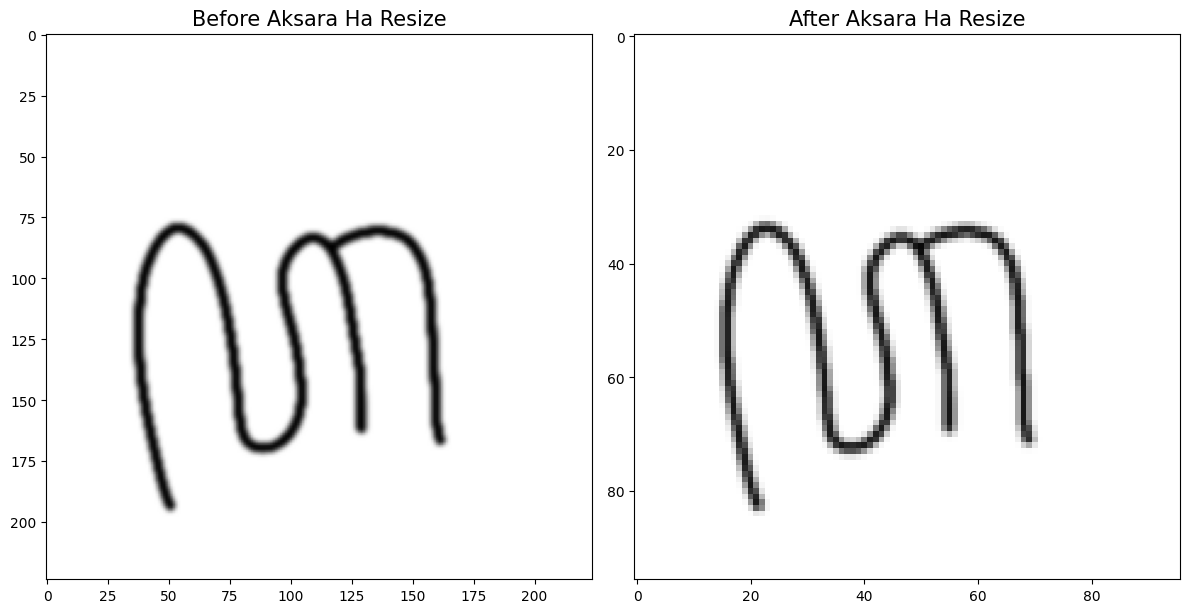

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Daftar gambar yang ingin ditampilkan
images_to_display = [
    'ha\\ha40.mine3.b.png'
]

# Define the target image size
IMAGE_SIZE = (96, 96)

# Menampilkan gambar yang dipilih dengan path yang diinginkan
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for image_path in images_to_display:
    file_path = os.path.join(path_main, image_path)
    original_image = cv2.imread(file_path)  # Baca gambar berwarna
    
    # Jika gambar tidak ditemukan atau tidak dapat dibaca
    if original_image is None:
        print(f"Error reading file: {file_path}")
        continue
    
    # Cetak ukuran gambar sebelum di-resize
    # print(f"Before Resize Aksara 'ha': {original_image.shape}")
    
    # Menampilkan gambar sebelum di-resize
    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    axes[0].set_title('Before Aksara Ha Resize', fontsize=15)
    axes[0].axis('on')
    
    resized_image = cv2.resize(original_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)  # Resize gambar
    
    # Cetak ukuran gambar setelah di-resize
    # print(f"After Resize Aksara 'ha': {resized_image.shape}")
    
    # Menampilkan gambar setelah di-resize
    axes[1].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
    axes[1].set_title('After Aksara Ha Resize', fontsize=15)
    axes[1].axis('on')

plt.tight_layout()
plt.show()

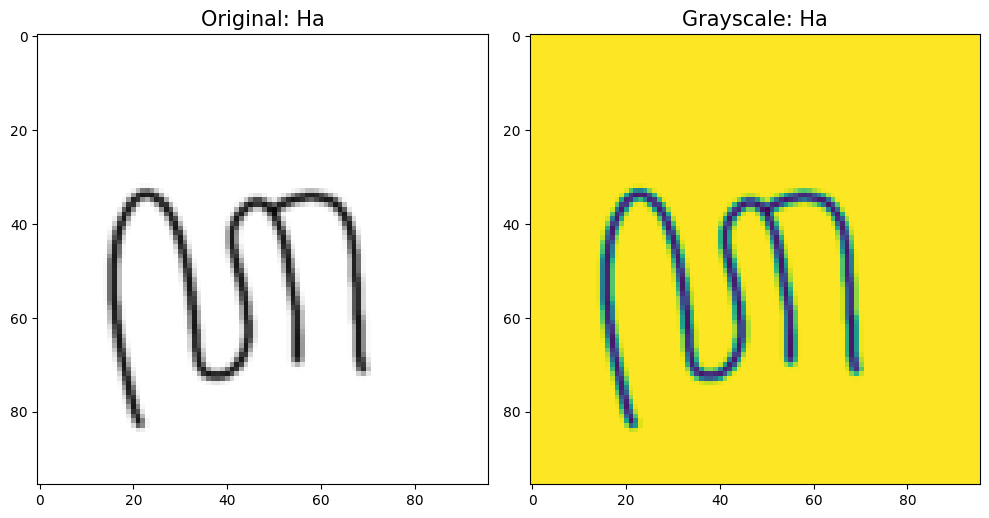

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
import random

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Daftar gambar yang ingin ditampilkan
images_to_display = [
    'ha\\ha40.mine3.b.png',
    # 'na\\na62.mine.rm10.png',
    # 'ca\\ca62.mine3.rm10.png',
    # 'ra\\ra122.pred3.r10.png'
]

# Define the target image size
IMAGE_SIZE = (96, 96)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1) # Unblur
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply laplacian filter 
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    thresh = 128
    maxValue = 255
    
    th, img = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)    
    return img

# Menampilkan gambar yang dipilih dengan path yang diinginkan
fig, axes = plt.subplots(len(images_to_display), 2, figsize=(10, len(images_to_display) * 5))

# Jika hanya satu gambar yang ditampilkan, axes adalah array 1D, konversi ke 2D
if len(images_to_display) == 1:
    axes = np.expand_dims(axes, axis=0)

for idx, image_path in enumerate(images_to_display):
    file_path = os.path.join(path_main, image_path)
    
    # Baca gambar asli
    original_image = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
    # Resize gambar asli
    original_image_resized = cv2.resize(original_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
    
    # Baca gambar sebagai grayscale
    grayscale_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # Resize gambar grayscale
    grayscale_image_resized = cv2.resize(grayscale_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
    # Terapkan preprocessing custom (opsional)
    image_filtered = grayscale_image_resized
    
    # Tampilkan gambar asli
    axes[idx, 0].imshow(original_image_resized)
    label = image_path.split('\\')[0]
    axes[idx, 0].set_title(f'Original: {label.capitalize()}', fontsize=15)
    axes[idx, 0].axis('on')
    
    # Tampilkan gambar grayscale
    # axes[idx, 1].imshow(image_filtered, cmap='gray')
    axes[idx, 1].imshow(image_filtered)
    axes[idx, 1].set_title(f'Grayscale: {label.capitalize()}', fontsize=15)
    axes[idx, 1].axis('on')

plt.tight_layout()
plt.show()

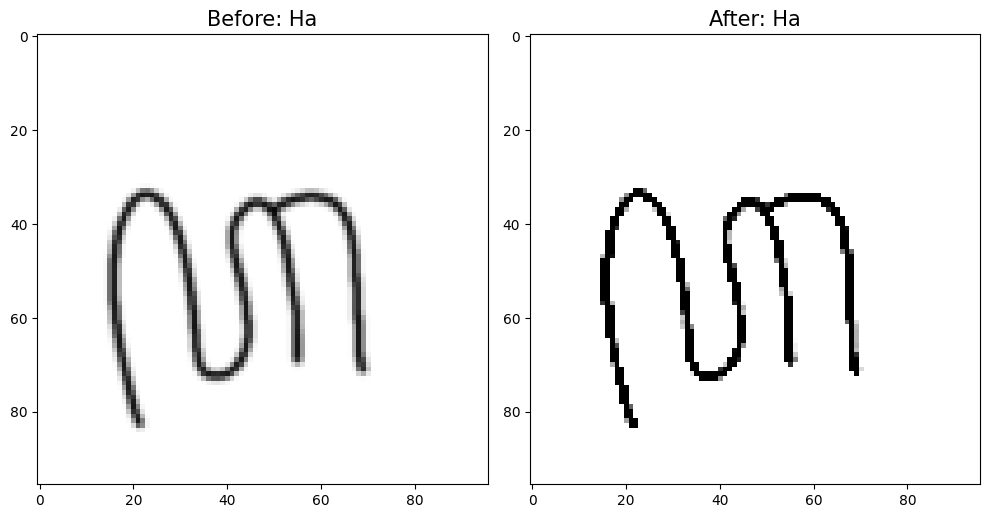

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
import random

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Daftar gambar yang ingin ditampilkan
images_to_display = [
    'ha\\ha40.mine3.b.png',
    # 'na\\na62.mine.rm10.png',
    # 'ca\\ca62.mine3.rm10.png',
    # 'ra\\ra122.pred3.r10.png'
]

# Define the target image size
IMAGE_SIZE = (96, 96)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Define the high-pass filter kernel (Laplacian filter)
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    # Apply the filter using convolution
    img = cv2.filter2D(img, -1, kernel)
    
    return img

# Menampilkan gambar yang dipilih dengan path yang diinginkan
fig, axes = plt.subplots(len(images_to_display), 2, figsize=(10, len(images_to_display) * 5))

# Jika hanya satu gambar yang ditampilkan, axes adalah array 1D, konversi ke 2D
if len(images_to_display) == 1:
    axes = np.expand_dims(axes, axis=0)

for idx, image_path in enumerate(images_to_display):
    file_path = os.path.join(path_main, image_path)
    
    # Baca gambar asli
    original_image = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
    # Resize gambar asli
    original_image_resized = cv2.resize(original_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
    
    # Baca gambar sebagai grayscale
    grayscale_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # Resize gambar grayscale
    grayscale_image_resized = cv2.resize(grayscale_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
    # Terapkan preprocessing custom (Gaussian Blur saja)
    image_filtered = apply_custom_preprocessing(grayscale_image_resized)
    
    # Tampilkan gambar asli
    axes[idx, 0].imshow(original_image_resized)
    label = image_path.split('\\')[0]
    axes[idx, 0].set_title(f'Before: {label.capitalize()}', fontsize=15)
    axes[idx, 0].axis('on')
    
    # Tampilkan gambar Gaussian Blur
    axes[idx, 1].imshow(image_filtered, cmap='gray')
    axes[idx, 1].set_title(f'After: {label.capitalize()}', fontsize=15)
    axes[idx, 1].axis('on')

plt.tight_layout()
plt.show()

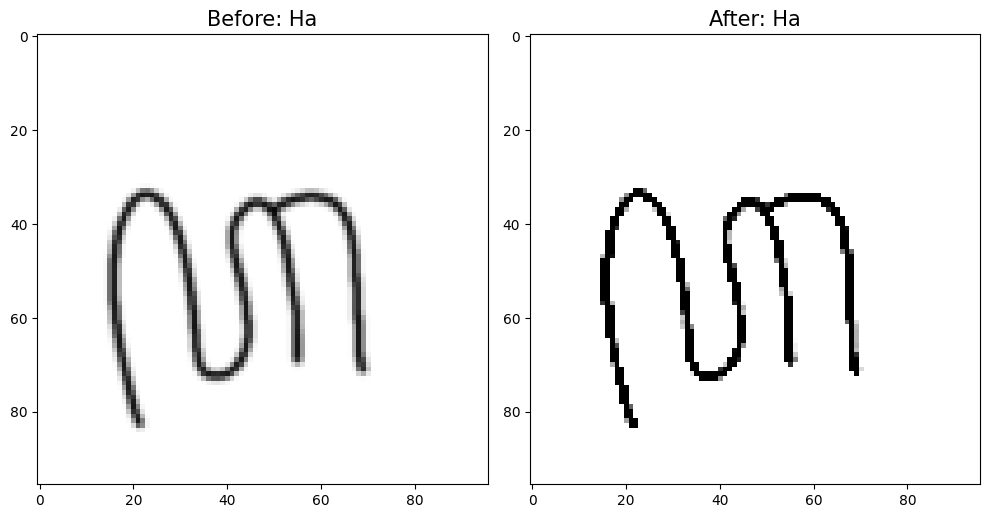

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
import random

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Daftar gambar yang ingin ditampilkan
images_to_display = [
    'ha\\ha40.mine3.b.png',
    # 'na\\na62.mine.rm10.png',
    # 'ca\\ca62.mine3.rm10.png',
    # 'ra\\ra122.pred3.r10.png'
]

# Define the target image size
IMAGE_SIZE = (96, 96)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Define the high-pass filter kernel (Laplacian filter)
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    # Apply the filter using convolution
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    
    return img

# Menampilkan gambar yang dipilih dengan path yang diinginkan
fig, axes = plt.subplots(len(images_to_display), 2, figsize=(10, len(images_to_display) * 5))

# Jika hanya satu gambar yang ditampilkan, axes adalah array 1D, konversi ke 2D
if len(images_to_display) == 1:
    axes = np.expand_dims(axes, axis=0)

for idx, image_path in enumerate(images_to_display):
    file_path = os.path.join(path_main, image_path)
    
    # Baca gambar asli
    original_image = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
    # Resize gambar asli
    original_image_resized = cv2.resize(original_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
    
    # Baca gambar sebagai grayscale
    grayscale_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # Resize gambar grayscale
    grayscale_image_resized = cv2.resize(grayscale_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
    # Terapkan preprocessing custom (Gaussian Blur saja)
    image_filtered = apply_custom_preprocessing(grayscale_image_resized)
    
    # Tampilkan gambar asli
    axes[idx, 0].imshow(original_image_resized)
    label = image_path.split('\\')[0]
    axes[idx, 0].set_title(f'Before: {label.capitalize()}', fontsize=15)
    axes[idx, 0].axis('on')
    
    # Tampilkan gambar Gaussian Blur
    axes[idx, 1].imshow(image_filtered, cmap='gray')
    axes[idx, 1].set_title(f'After: {label.capitalize()}', fontsize=15)
    axes[idx, 1].axis('on')

plt.tight_layout()
plt.show()


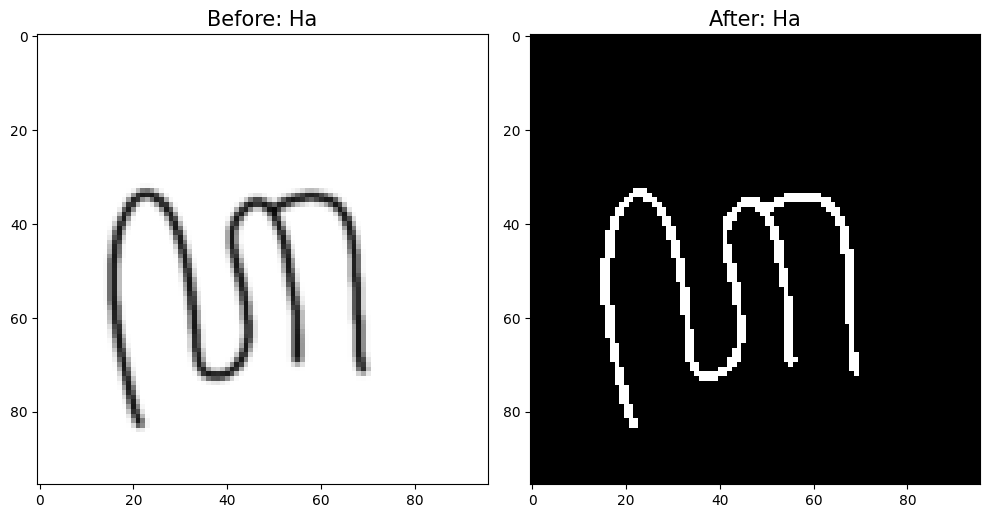

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
import random

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Daftar gambar yang ingin ditampilkan
images_to_display = [
    'ha\\ha40.mine3.b.png',
    # 'na\\na62.mine.rm10.png',
    # 'ca\\ca62.mine3.rm10.png',
    # 'ra\\ra122.pred3.r10.png'
]

# Define the target image size
IMAGE_SIZE = (96, 96)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Define the high-pass filter kernel (Laplacian filter)
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    # Apply the filter using convolution
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1) 
    # Apply Otsu's thresholding
    thresh = 0
    maxValue = 255

    th, img = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)    
    return img

# Menampilkan gambar yang dipilih dengan path yang diinginkan
fig, axes = plt.subplots(len(images_to_display), 2, figsize=(10, len(images_to_display) * 5))

# Jika hanya satu gambar yang ditampilkan, axes adalah array 1D, konversi ke 2D
if len(images_to_display) == 1:
    axes = np.expand_dims(axes, axis=0)

for idx, image_path in enumerate(images_to_display):
    file_path = os.path.join(path_main, image_path)
    
    # Baca gambar asli
    original_image = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)
    # Resize gambar asli
    original_image_resized = cv2.resize(original_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
    
    # Baca gambar sebagai grayscale
    grayscale_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    # Resize gambar grayscale
    grayscale_image_resized = cv2.resize(grayscale_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)
    # Terapkan preprocessing custom (Gaussian Blur saja)
    image_filtered = apply_custom_preprocessing(grayscale_image_resized)
    
    # Tampilkan gambar asli
    axes[idx, 0].imshow(original_image_resized)
    label = image_path.split('\\')[0]
    axes[idx, 0].set_title(f'Before: {label.capitalize()}', fontsize=15)
    axes[idx, 0].axis('on')
    
    # Tampilkan gambar Gaussian Blur
    axes[idx, 1].imshow(image_filtered, cmap='gray')
    axes[idx, 1].set_title(f'After: {label.capitalize()}', fontsize=15)
    axes[idx, 1].axis('on')

plt.tight_layout()
plt.show()


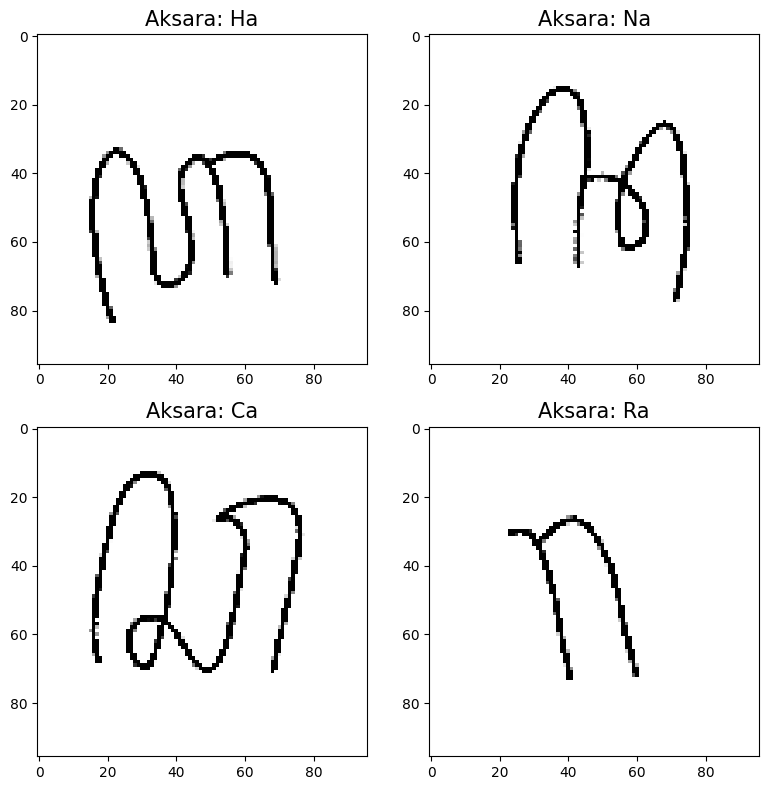

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
import random

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Daftar gambar yang ingin ditampilkan
images_to_display = [
    'ha\\ha40.mine3.b.png',
    'na\\na62.mine.rm10.png',
    'ca\\ca62.mine3.rm10.png',
    'ra\\ra122.pred3.r10.png'
]

# Define the target image size
IMAGE_SIZE = (96, 96)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    # _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # img = 255 - img
    
    return img

# Menampilkan gambar yang dipilih dengan path yang diinginkan
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for ax, image_path in zip(axes, images_to_display):
    file_path = os.path.join(path_main, image_path)
    grayscale_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
    grayscale_image_resized = cv2.resize(grayscale_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
    image_filtered = apply_custom_preprocessing(grayscale_image_resized)
    
    ax.imshow(image_filtered, cmap='gray')
    label = image_path.split('\\')[0]
    ax.set_title(f'Aksara: {label.capitalize()}', fontsize=15)
    ax.axis('on')

plt.tight_layout()
plt.show()

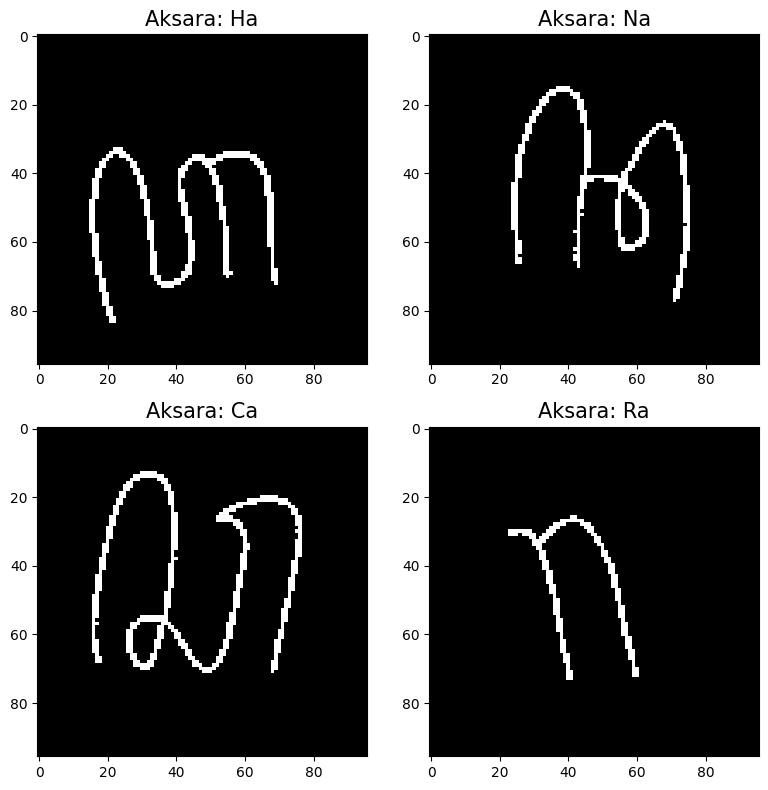

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
import random

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Daftar gambar yang ingin ditampilkan
images_to_display = [
    'ha\\ha40.mine3.b.png',
    'na\\na62.mine.rm10.png',
    'ca\\ca62.mine3.rm10.png',
    'ra\\ra122.pred3.r10.png'
]

# Define the target image size
IMAGE_SIZE = (96, 96)

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = 255 - img
    
    return img

# Menampilkan gambar yang dipilih dengan path yang diinginkan
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for ax, image_path in zip(axes, images_to_display):
    file_path = os.path.join(path_main, image_path)
    grayscale_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
    grayscale_image_resized = cv2.resize(grayscale_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
    image_filtered = apply_custom_preprocessing(grayscale_image_resized)
    
    ax.imshow(image_filtered, cmap='gray')
    label = image_path.split('\\')[0]
    ax.set_title(f'Aksara: {label.capitalize()}', fontsize=15)
    ax.axis('on')

plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import os
# import cv2
# from tensorflow.keras.utils import to_categorical
# import random

# # Path ke file CSV
# path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
# file = path_main + "labels.csv"
# df = pd.read_csv(file)

# # Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# # Daftar gambar yang ingin ditampilkan
# images_to_display = [
#     'ha\\ha3.nando.r5.png',
#     'na\\na62.mine.rm10.png',
#     'ca\\ca62.mine3.rm10.png',
#     'ra\\ra122.pred3.r10.png'
# ]

# # Define the target image size
# IMAGE_SIZE = (96, 96)

# def apply_custom_preprocessing(image):
#     # Apply Gaussian Blur
#     ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
#     # Enhance the image sharpness
#     img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
#     # Apply sharpening filter
#     kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#     img = cv2.filter2D(img, -1, kernel)
#     # Remove noise using median filter
#     img = cv2.medianBlur(img, 1)
#     # Apply Otsu's thresholding
#     _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#     # Invert the image (background to black, text to white)
#     img = 255 - img
    
#     # Apply dilation to thicken the lines
#     kernel = np.ones((2, 2), np.uint8)  # You can adjust the kernel size
#     img = cv2.dilate(img, kernel, iterations=1)
    
#     return img

# # Menampilkan gambar yang dipilih dengan path yang diinginkan
# fig, axes = plt.subplots(len(images_to_display), 3, figsize=(12, len(images_to_display) * 4))
# axes = axes.flatten()

# for i, image_path in enumerate(images_to_display):
#     file_path = os.path.join(path_main, image_path)
    
#     # Load the original image
#     original_image = cv2.cvtColor(cv2.imread(file_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
#     original_image_resized = cv2.resize(original_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)  # Resize gambar asli
    
#     # Load the grayscale image
#     grayscale_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
#     grayscale_image_resized = cv2.resize(grayscale_image, IMAGE_SIZE, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
    
#     # Apply custom preprocessing
#     image_filtered = apply_custom_preprocessing(grayscale_image_resized)
    
#     # Plot original image
#     axes[i * 3].imshow(original_image_resized)
#     axes[i * 3].set_title(f'Original: {image_path.split("\\")[0].capitalize()}', fontsize=12)
#     axes[i * 3].axis('on')
    
#     # Plot grayscale image
#     axes[i * 3 + 1].imshow(grayscale_image_resized, cmap='gray')
#     axes[i * 3 + 1].set_title(f'Grayscale: {image_path.split("\\")[0].capitalize()}', fontsize=12)
#     axes[i * 3 + 1].axis('on')
    
#     # Plot filtered image
#     axes[i * 3 + 2].imshow(image_filtered, cmap='gray')
#     axes[i * 3 + 2].set_title(f'Filtered: {image_path.split("\\")[0].capitalize()}', fontsize=12)
#     axes[i * 3 + 2].axis('on')

# plt.tight_layout()
# plt.show()


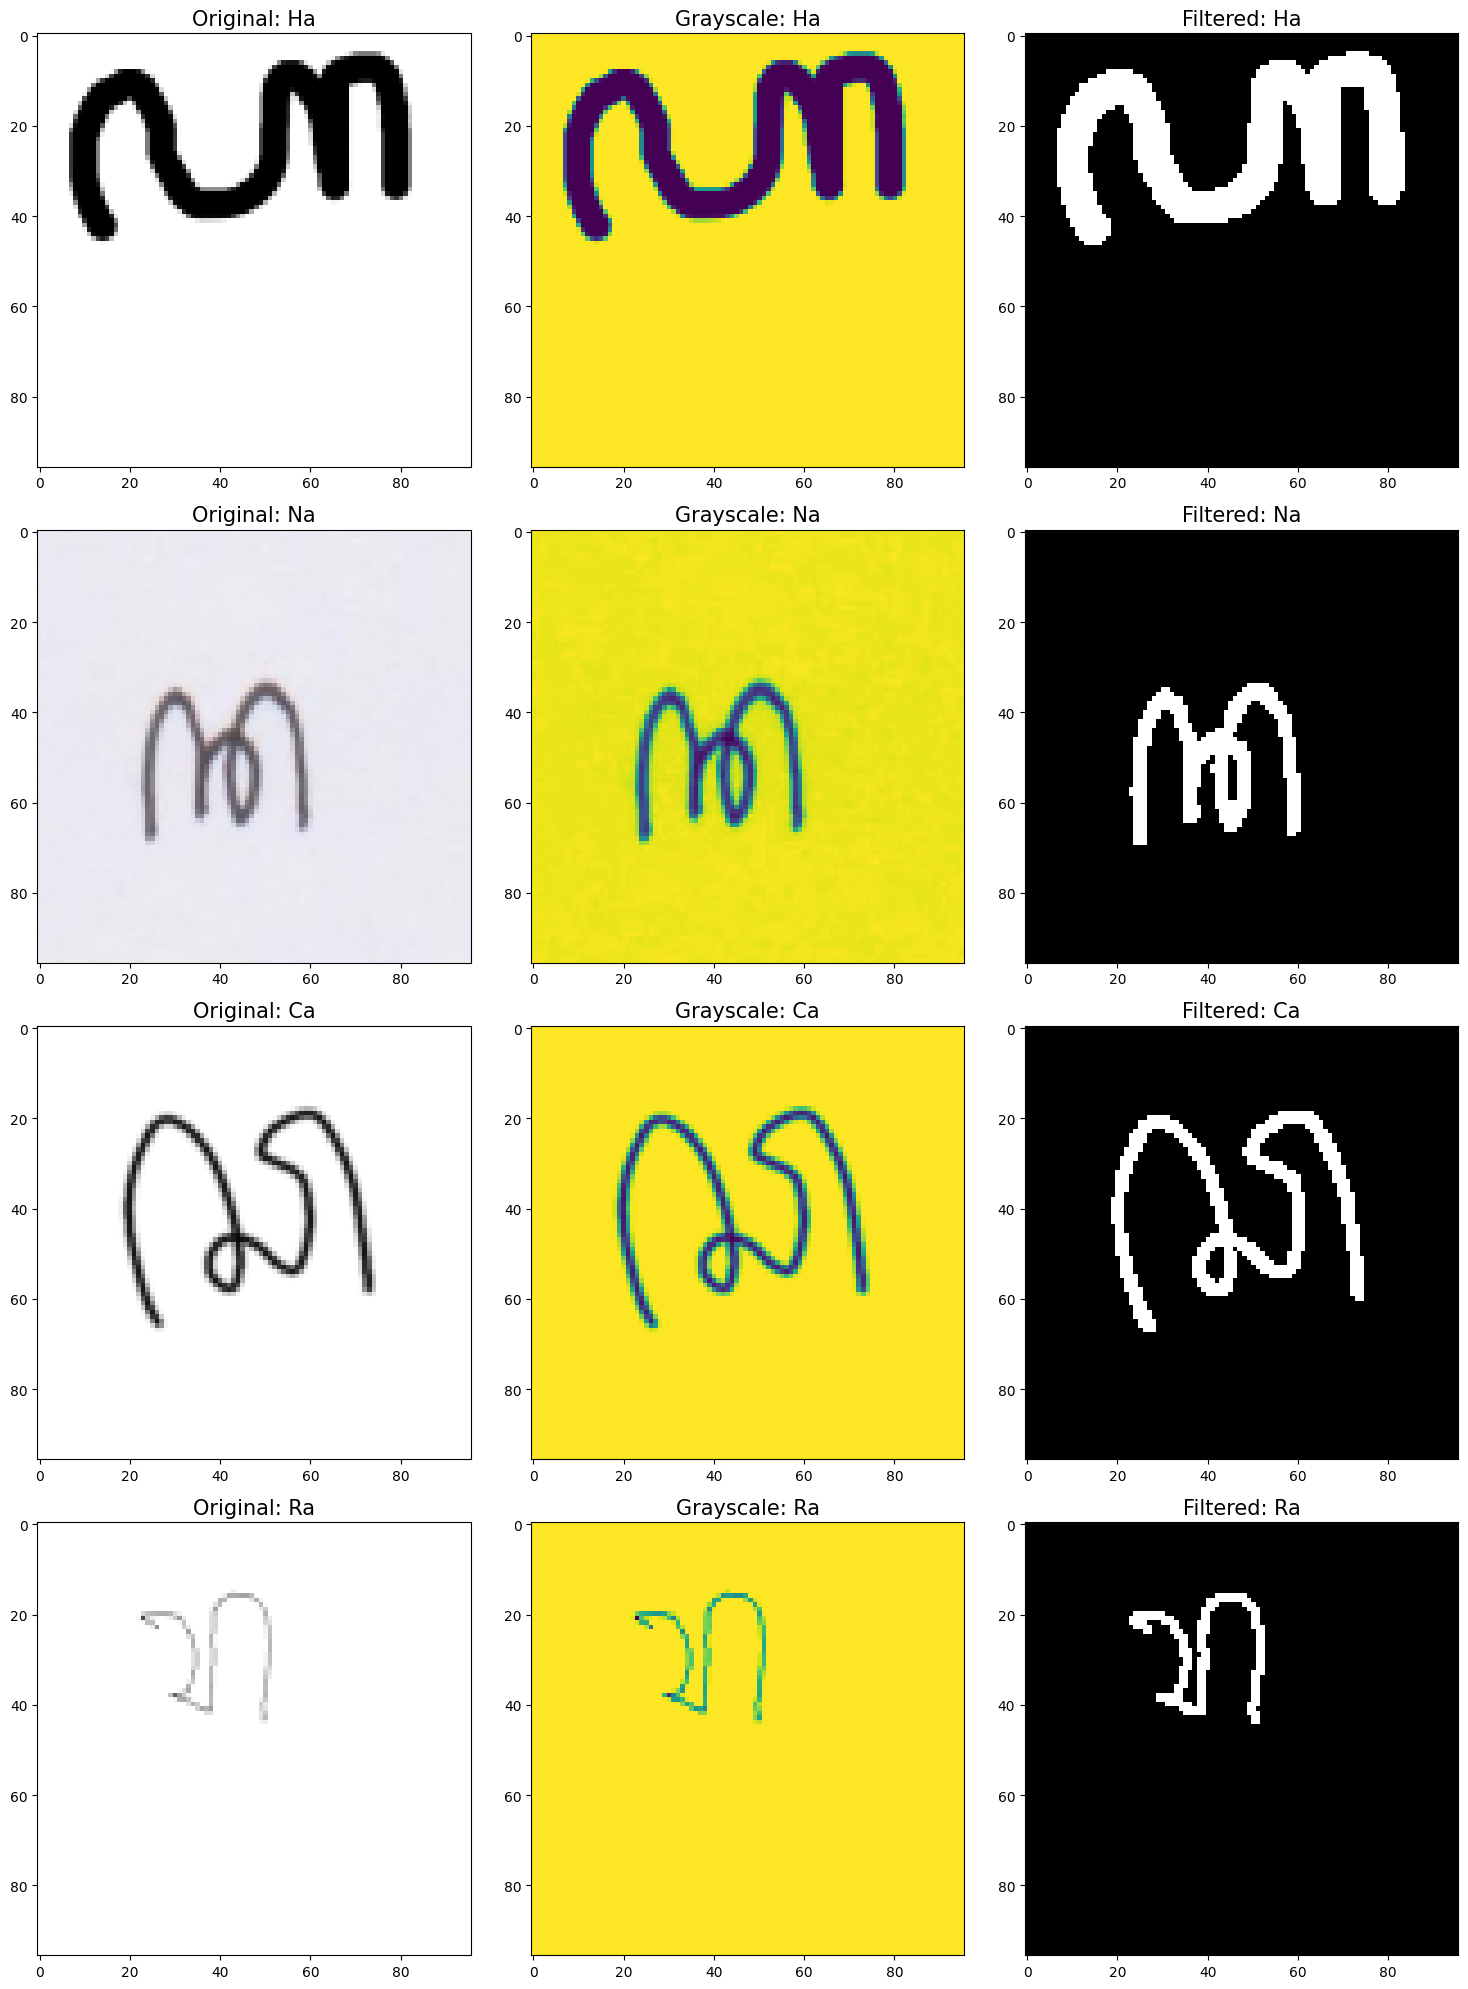

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
import random

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 
          'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# Define the target image size
IMAGE_SIZE = (96, 96)
INPUT_SHAPE = (96, 96, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index

def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    # Apply dilation to thicken the lines
    kernel = np.ones((2, 2), np.uint8)  # You can adjust the kernel size
    img = cv2.dilate(img, kernel, iterations=1)
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

# Define the specific labels you want to display
desired_labels = ['ha', 'na', 'ca', 'ra']

# Find the indices of the images that match the desired labels
desired_indices = [np.where(np.argmax(y_label, axis=1) == AKSARA.index(label))[0] for label in desired_labels]

# Randomly select one image index from each desired label
selected_indices = [random.choice(indices) for indices in desired_indices]

# Menampilkan gambar yang dipilih dengan label yang diinginkan
fig, axes = plt.subplots(len(desired_labels), 3, figsize=(15, len(desired_labels) * 5))
axes = axes.flatten()

for i, idx in enumerate(selected_indices):
    axes[i * 3].imshow(X_original[idx])
    axes[i * 3].set_title(f'Original: {AKSARA[np.argmax(y_label[idx])].capitalize()}', fontsize=15)
    axes[i * 3].axis('on')
    
    axes[i * 3 + 1].imshow(X_grayscale[idx])
    axes[i * 3 + 1].set_title(f'Grayscale: {AKSARA[np.argmax(y_label[idx])].capitalize()}', fontsize=15)
    axes[i * 3 + 1].axis('on')
    
    axes[i * 3 + 2].imshow(X_filtered[idx], cmap='gray')
    axes[i * 3 + 2].set_title(f'Filtered: {AKSARA[np.argmax(y_label[idx])].capitalize()}', fontsize=15)
    axes[i * 3 + 2].axis('on')

plt.tight_layout()
plt.show()

# Dataset Collection for 4 Data Sources

Menampilkan jumlah gambar di setiap kelas nya

In [80]:
# Dictionary untuk menyimpan jumlah data di setiap kelas
aksaraJowo = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\Dataset_Collection_4_Data_Sources"
kelas_data_count = {}

# Loop melalui setiap kelas di dalam folder output
for class_name in os.listdir(aksaraJowo):
    class_path = os.path.join(aksaraJowo, class_name)
    
    # Menghitung jumlah file gambar di setiap kelas
    num_images = len([file for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))])
    
    # Menyimpan jumlah data di setiap kelas ke dalam dictionary
    kelas_data_count[class_name] = num_images

# Menampilkan jumlah data di setiap kelas
for class_name, count in kelas_data_count.items():
    print(f"Kelas {class_name}: {count} gambar")

Kelas ba: 225 gambar
Kelas ca: 218 gambar
Kelas da: 220 gambar
Kelas dha: 218 gambar
Kelas ga: 219 gambar
Kelas ha: 214 gambar
Kelas ja: 218 gambar
Kelas ka: 219 gambar
Kelas la: 219 gambar
Kelas ma: 218 gambar
Kelas na: 219 gambar
Kelas nga: 211 gambar
Kelas nya: 214 gambar
Kelas pa: 216 gambar
Kelas ra: 217 gambar
Kelas sa: 219 gambar
Kelas ta: 216 gambar
Kelas tha: 217 gambar
Kelas wa: 220 gambar
Kelas ya: 218 gambar


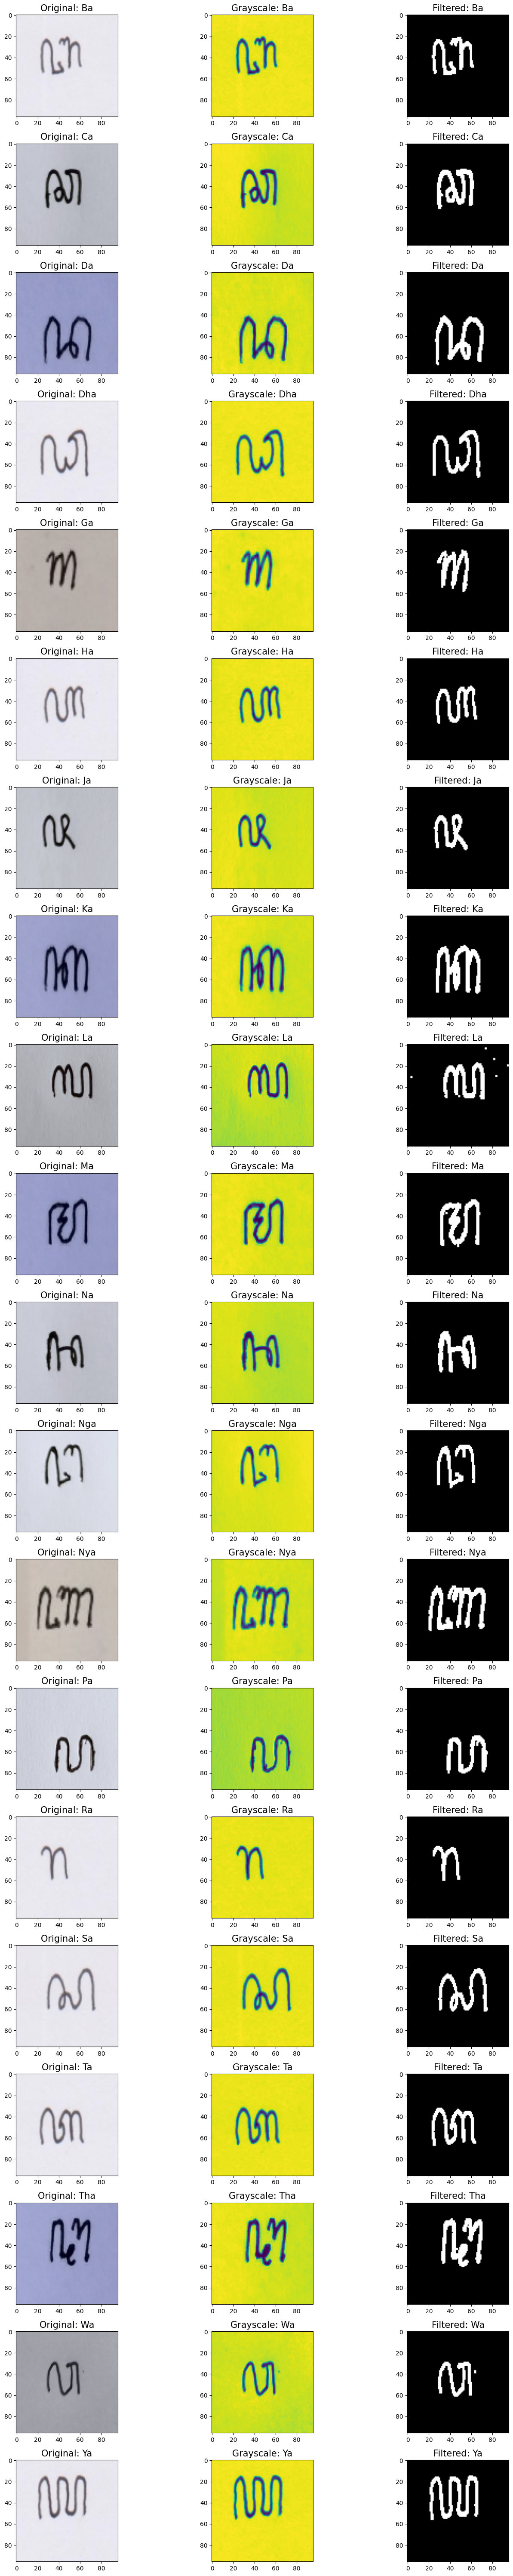

In [68]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 
          'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# Define the target image size
IMAGE_SIZE = (96, 96)
INPUT_SHAPE = (96, 96, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    # Apply dilation to thicken the lines
    kernel = np.ones((2, 2), np.uint8)  # You can adjust the kernel size
    img = cv2.dilate(img, kernel, iterations=1)
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

# Menampilkan satu gambar dari setiap kelas
unique_labels = np.argmax(y_label, axis=1)
selected_indices = [np.where(unique_labels == i)[0][0] for i in range(len(AKSARA))]

fig, axes = plt.subplots(len(selected_indices), 3, figsize=(15, len(selected_indices) * 3))
axes = axes.flatten()

for i, idx in enumerate(selected_indices):
    axes[i * 3].imshow(X_original[idx])
    axes[i * 3].set_title(f'Original: {AKSARA[np.argmax(y_label[idx])].capitalize()}', fontsize=15)
    axes[i * 3].axis('on')

    axes[i * 3 + 1].imshow(X_grayscale[idx])
    axes[i * 3 + 1].set_title(f'Grayscale: {AKSARA[np.argmax(y_label[idx])].capitalize()}', fontsize=15)
    axes[i * 3 + 1].axis('on')

    axes[i * 3 + 2].imshow(X_filtered[idx], cmap='gray')
    axes[i * 3 + 2].set_title(f'Filtered: {AKSARA[np.argmax(y_label[idx])].capitalize()}', fontsize=15)
    axes[i * 3 + 2].axis('on')

plt.tight_layout()
plt.show()

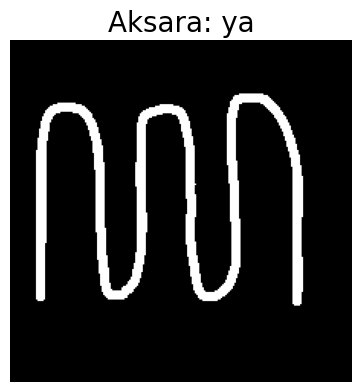

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    # Apply dilation to thicken the lines
    # kernel = np.ones((2, 2), np.uint8)  # You can adjust the kernel size
    # img = cv2.dilate(img, kernel, iterations=1)
    
    return img

# Load and preprocess an example image
image_path = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\ya\\ya16.nando.png"  # Ganti dengan path gambar Anda
label = "ya"  # Ganti dengan label yang sesuai
original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
preprocessed_image = apply_custom_preprocessing(grayscale_image)

# Display the images
plt.figure(figsize=(15, 5))

# # Original Image
# plt.subplot(1, 3, 1)
# plt.title('Original Image\nLabel: ' + label)
# plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
# plt.axis('on')

# # Grayscale Image
# plt.subplot(1, 3, 2)
# plt.title('Grayscale Image\nLabel: ' + label)
# plt.imshow(grayscale_image, cmap='gray')
# plt.axis('on')

# Preprocessed Image
# plt.subplot(1, 3, 3)
plt.subplot(1, 3, 1)
plt.title('Aksara: ' + label, fontsize=20)
plt.imshow(preprocessed_image, cmap='gray')
plt.axis('off')

plt.show()

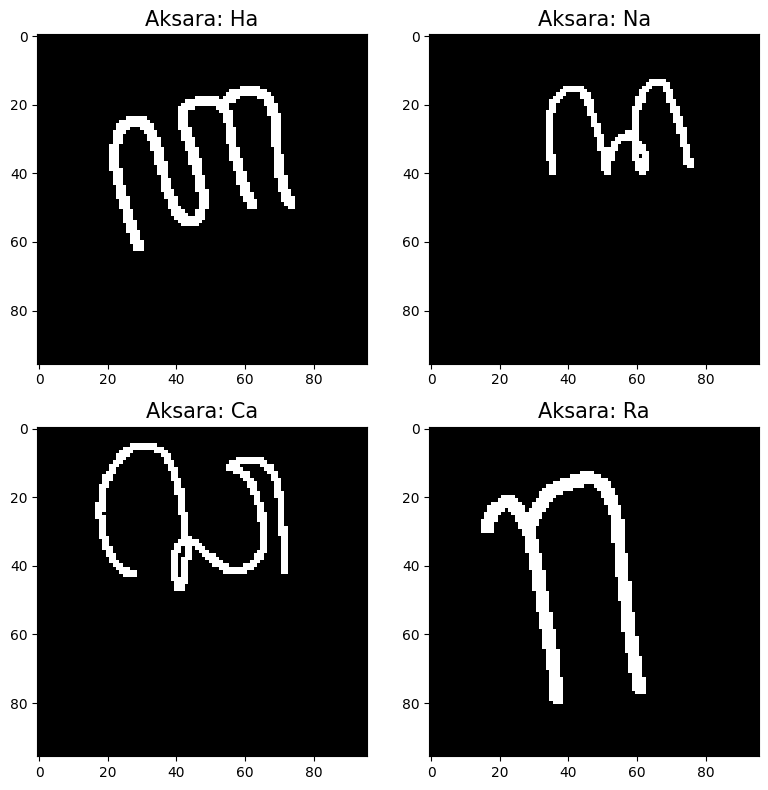

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
import random

# Path ke file CSV
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.6_data_collection\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)

# Menampilkan 5 baris pertama untuk memeriksa struktur dataframe
# print(df.head())

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 
          'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# Define the target image size
IMAGE_SIZE = (96, 96)
INPUT_SHAPE = (96, 96, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index

def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (15, 15), 0.1)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = 255 - img
    
    # Apply dilation to thicken the lines
    kernel = np.ones((2, 2), np.uint8)  # You can adjust the kernel size
    img = cv2.dilate(img, kernel, iterations=1)
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

# Define the specific labels you want to display
desired_labels = ['ha', 'na', 'ca', 'ra']

# Find the indices of the images that match the desired labels
desired_indices = [np.where(np.argmax(y_label, axis=1) == AKSARA.index(label))[0] for label in desired_labels]

# Randomly select one image index from each desired label
selected_indices = [random.choice(indices) for indices in desired_indices]

# Menampilkan gambar yang dipilih dengan label yang diinginkan
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

for ax, idx in zip(axes, selected_indices):
    ax.imshow(X_filtered[idx], cmap='gray')
    label_index = np.argmax(y_label[idx])
    ax.set_title(f'Aksara: {AKSARA[label_index].capitalize()}', fontsize=15)
    ax.axis('on')

plt.tight_layout()
plt.show()